# ADHD Prediction: Logistic Regression & Random Forest
This notebook demonstrates classification using Logistic Regression and Random Forest, including model training, evaluation, and feature importance.

In [16]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [17]:
# Load your data
df = pd.read_csv('C:\\Users\\04ama\\OneDrive\\chemistry\\ADHD_SEX_Prediction\\notebooks\\Feature Engineering\\final_dataset.csv')  # Update with your actual path
target_col = 'ADHD_Outcome' 
X = df.drop(columns=[target_col, 'participant_id'], axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [18]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
cv_scores_lr = cross_val_score(lr, X, y, cv=5)
print('Cross-validated accuracy:', cv_scores_lr.mean())

Logistic Regression Accuracy: 0.7818930041152263
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        87
           1       0.80      0.88      0.84       156

    accuracy                           0.78       243
   macro avg       0.77      0.74      0.75       243
weighted avg       0.78      0.78      0.78       243

Cross-validated accuracy: 0.8038261401897765


## Random Forest

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print('Random Forest Cross-validated accuracy:', cv_scores_rf.mean())

Random Forest Accuracy: 0.757201646090535
              precision    recall  f1-score   support

           0       0.72      0.53      0.61        87
           1       0.77      0.88      0.82       156

    accuracy                           0.76       243
   macro avg       0.74      0.71      0.72       243
weighted avg       0.75      0.76      0.75       243

Random Forest Cross-validated accuracy: 0.7922694963099003


## Feature Importance (Random Forest)

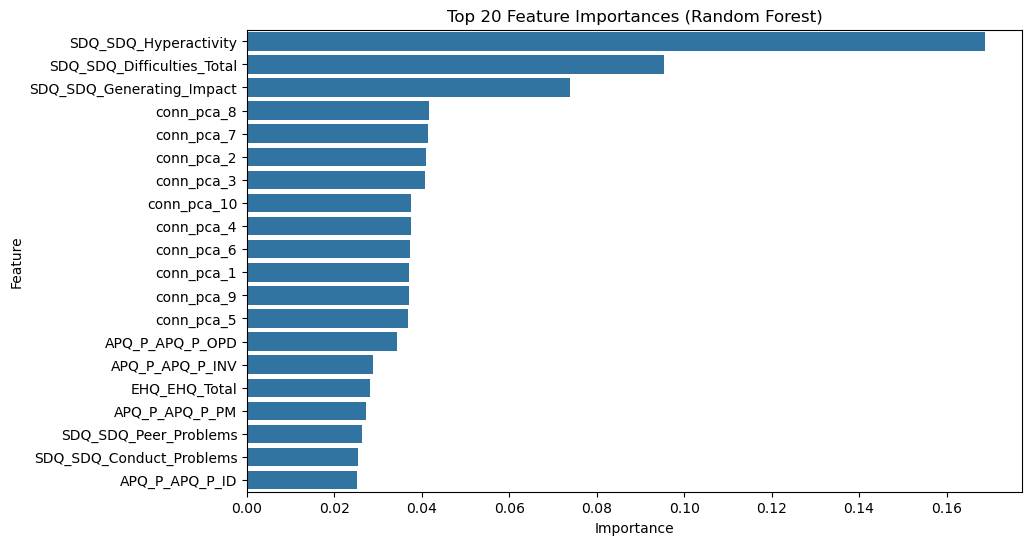

In [20]:
importances = rf.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp.sort_values('Importance', ascending=False, inplace=True)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(20))
plt.title('Top 20 Feature Importances (Random Forest)')
plt.show()

In [21]:
# Hyperparameter tuning with GridSearchCV for Logistic Regression

lr_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='f1')
lr_grid.fit(X_train, y_train)
lr_best = lr_grid.best_estimator_
print('Best Logistic Regression Params:', lr_grid.best_params_)
y_pred_lr = lr_best.predict(X_test)
print('Logistic Regression F1:', classification_report(y_test, y_pred_lr))

Best Logistic Regression Params: {'C': 1, 'solver': 'liblinear'}
Logistic Regression F1:               precision    recall  f1-score   support

           0       0.74      0.61      0.67        87
           1       0.80      0.88      0.84       156

    accuracy                           0.78       243
   macro avg       0.77      0.74      0.75       243
weighted avg       0.78      0.78      0.78       243



In [22]:
# Hyperparameter tuning with GridSearchCV for Random Forest
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
print('Best Random Forest Params:', rf_grid.best_params_)
y_pred_rf = rf_best.predict(X_test)
print('Random Forest F1:', classification_report(y_test, y_pred_rf))

Best Random Forest Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest F1:               precision    recall  f1-score   support

           0       0.70      0.54      0.61        87
           1       0.77      0.87      0.82       156

    accuracy                           0.75       243
   macro avg       0.74      0.71      0.71       243
weighted avg       0.75      0.75      0.74       243



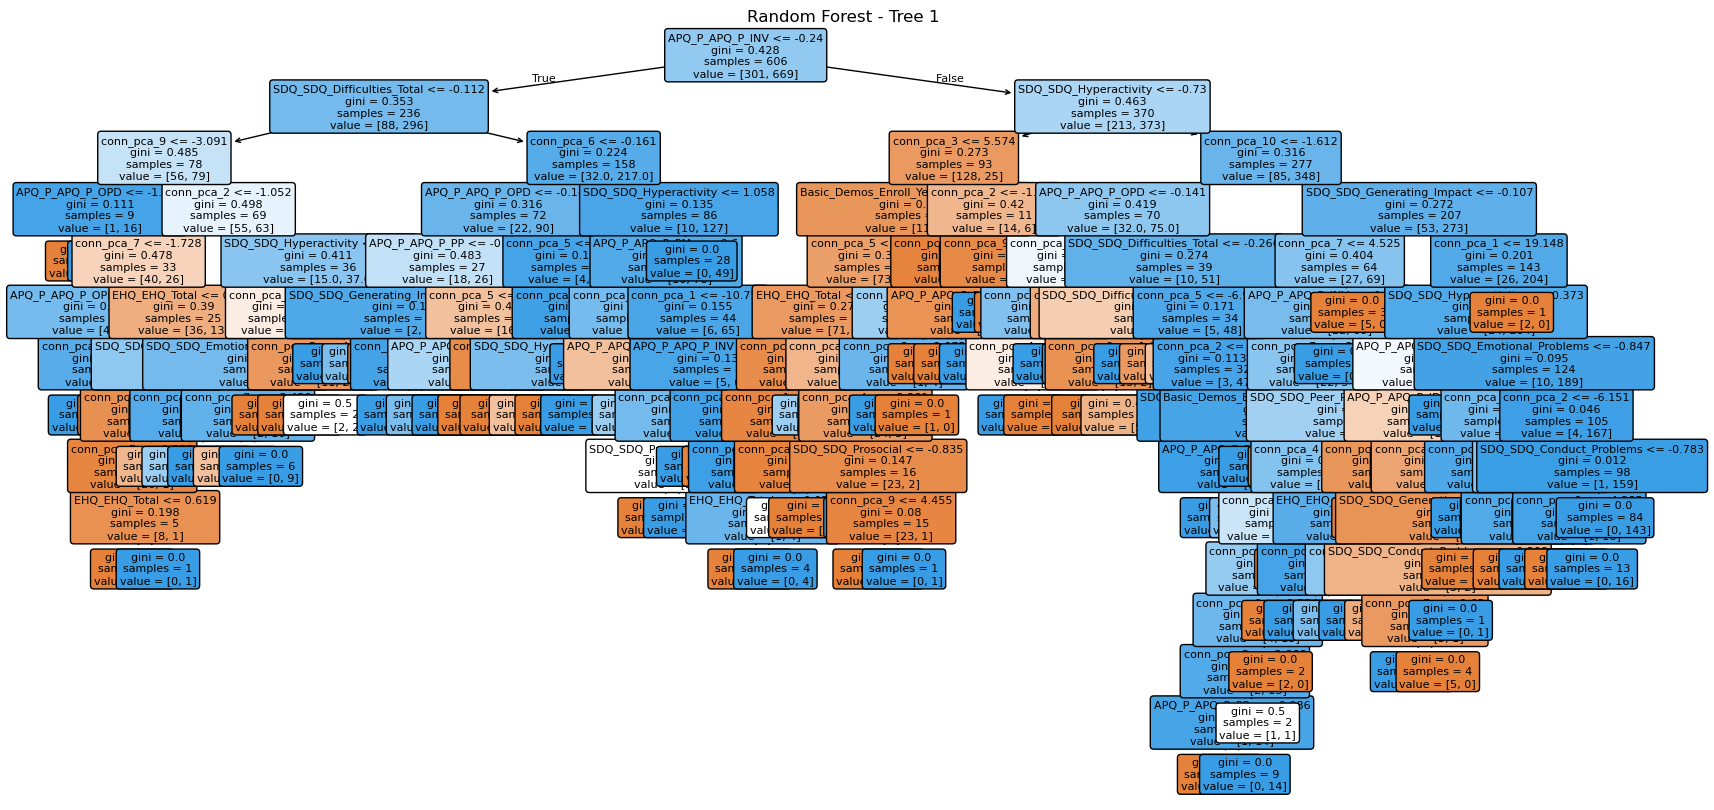

In [23]:


# Visualize the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_best.estimators_[0], feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.title("Random Forest - Tree 1")
plt.show()

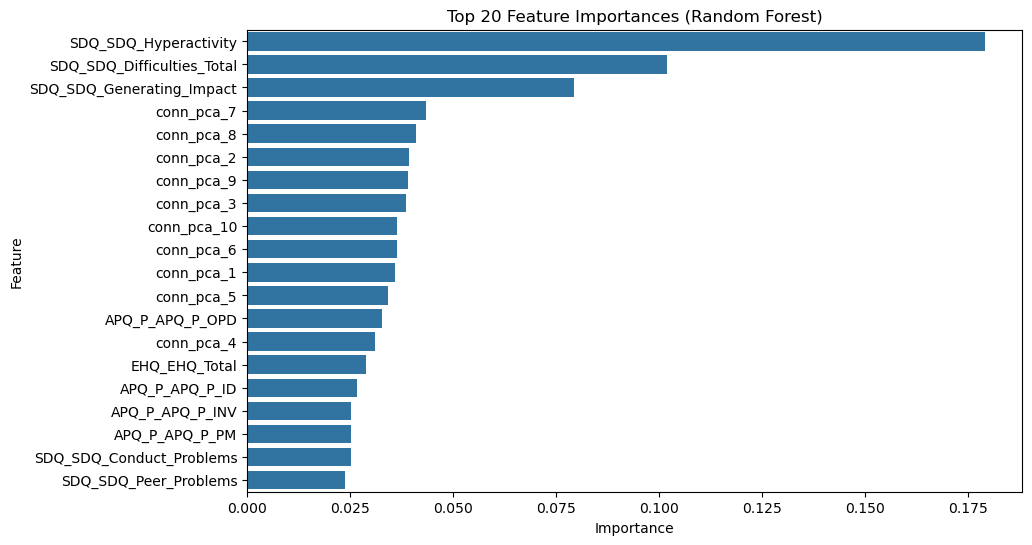

In [24]:
importances = rf_best.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp.sort_values('Importance', ascending=False, inplace=True)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(20))
plt.title('Top 20 Feature Importances (Random Forest)')
plt.show()


In [25]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


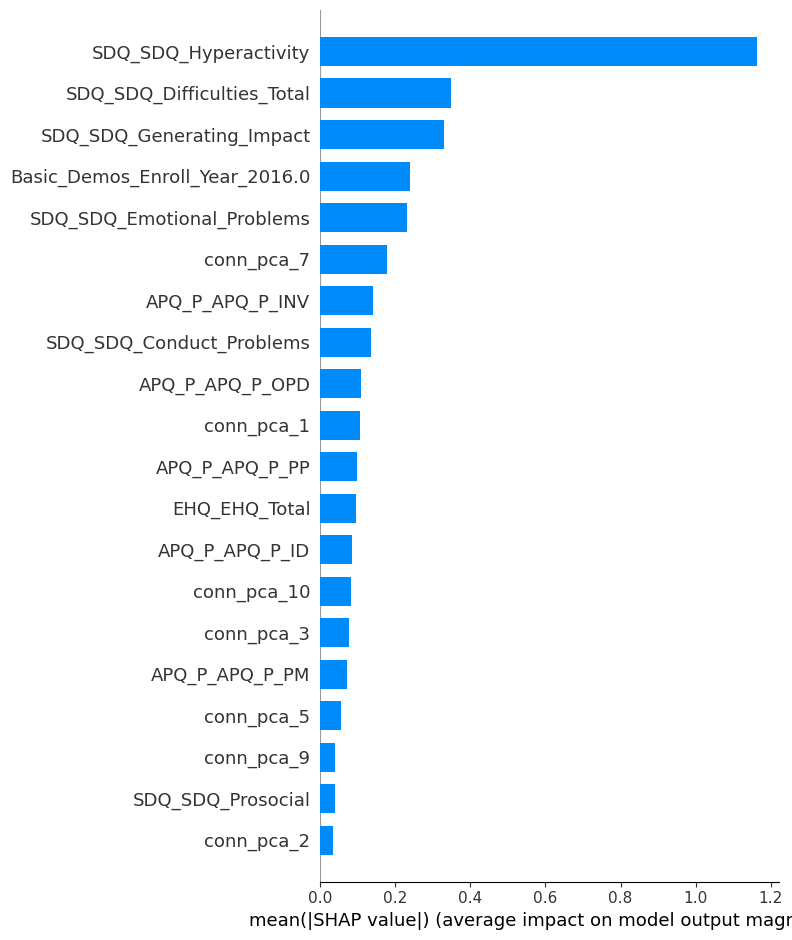

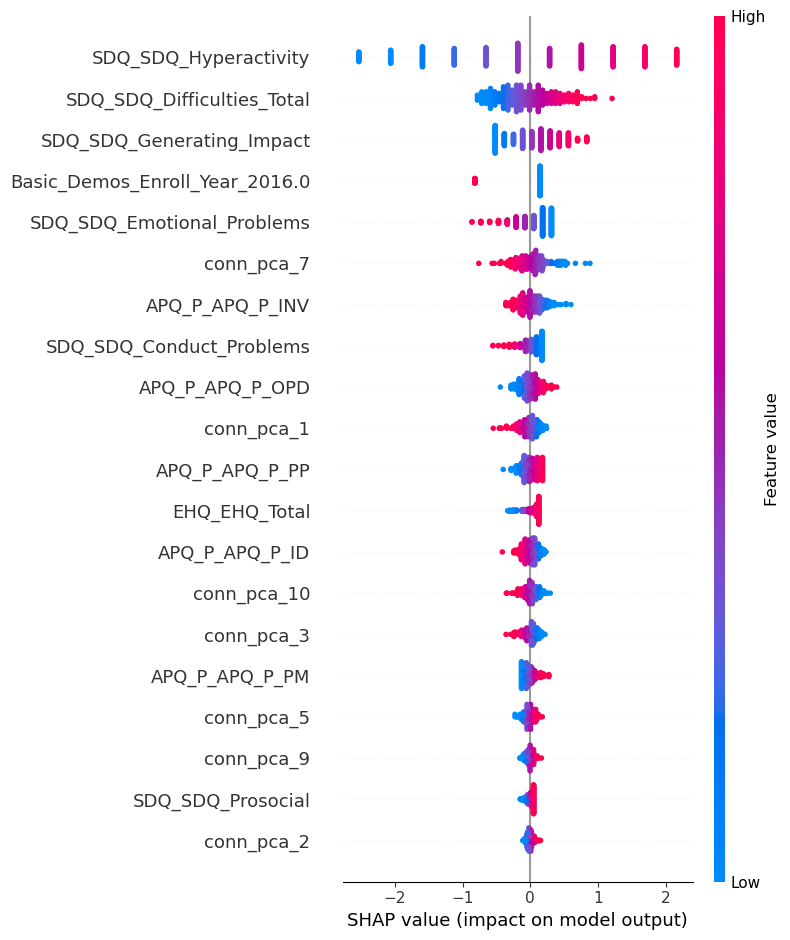

In [26]:
import shap
explainer_lr = shap.LinearExplainer(lr_best, X_train)
shap_values_lr = explainer_lr.shap_values(X_test)
shap.summary_plot(shap_values_lr, X_test, plot_type="bar")
shap.summary_plot(shap_values_lr, X_test)


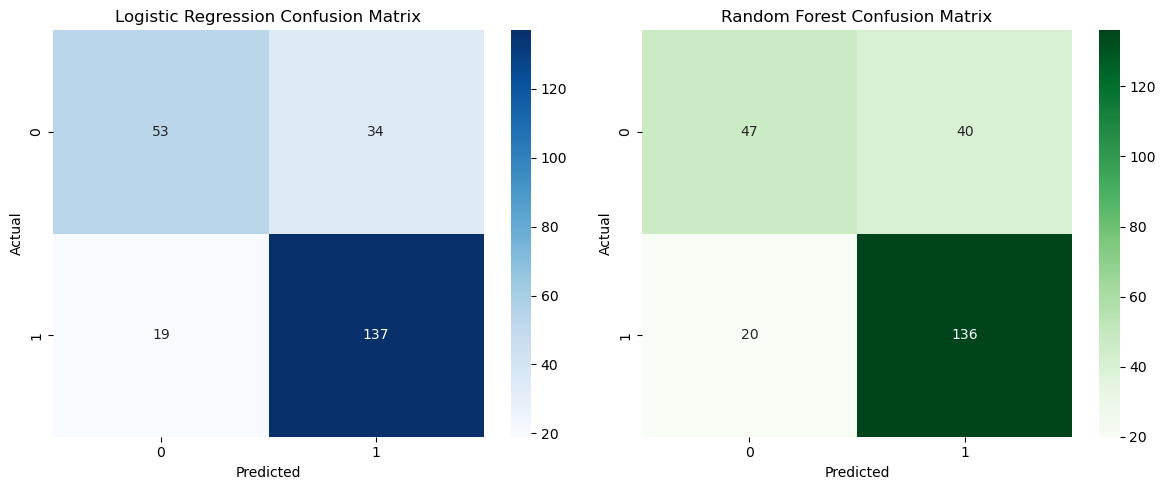

Logistic Regression F1 Score: 0.8379204892966361
Random Forest F1 Score: 0.8192771084337349


In [27]:

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1,2,2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print('Logistic Regression F1 Score:', f1_score(y_test, y_pred_lr))
print('Random Forest F1 Score:', f1_score(y_test, y_pred_rf))